In [40]:
import pandas as pd
import seaborn as sns



In [41]:
matches = pd.read_csv('../data/merged_after_odds.csv', index_col=False)
sample = pd.read_csv('../data/final_dataset.csv', index_col=False)



In [42]:
matches.shape


(7260, 24)

In [43]:
sample.shape

(6840, 40)

In [44]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AC,HF,AF,HY,AY,HR,AR,B365H,B365D,B365A
0,2000-08-19,E0,Charlton,Man City,4,0,2,0,H,17,...,6,13,12,1,2,0,0,NaN,NaN,NaN
1,2000-08-19,E0,Chelsea,West Ham,4,2,1,0,H,17,...,7,19,14,1,2,0,0,NaN,NaN,NaN
2,2000-08-19,E0,Coventry,Middlesbrough,1,3,1,1,A,6,...,4,15,21,5,3,1,0,NaN,NaN,NaN
3,2000-08-19,E0,Derby,Southampton,2,2,1,2,D,6,...,8,11,13,1,1,0,0,NaN,NaN,NaN
4,2000-08-19,E0,Leeds,Everton,2,0,2,0,H,17,...,4,21,20,1,3,0,0,NaN,NaN,NaN


In [45]:
matches.tail()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AC,HF,AF,HY,AY,HR,AR,B365H,B365D,B365A
7255,2020-02-15,E0,Norwich,Liverpool,0,1,0,0,A,5,...,7,5,11,1,2,0,0,11.00,6.25,1.25
7256,2020-02-16,E0,Aston Villa,Tottenham,2,3,1,2,A,18,...,7,12,10,2,0,0,0,4.00,3.80,1.85
7257,2020-02-16,E0,Arsenal,Newcastle,4,0,0,0,H,15,...,6,15,9,2,0,0,0,1.40,4.75,8.00
7258,2020-02-17,E0,Chelsea,Man United,0,2,0,1,A,17,...,8,11,11,4,3,0,0,1.85,3.50,4.50
7259,2020-02-19,E0,Man City,West Ham,2,0,1,0,H,20,...,1,5,7,0,1,0,0,1.12,9.50,17.00


In [46]:
30 * 20 * 18

10800

In [47]:
matches.shape

(7260, 24)

In [48]:
matches['HomeTeam'].value_counts()

HomeTeam
Chelsea             364
Arsenal             364
Everton             364
Man United          363
Liverpool           362
Tottenham           361
Man City            344
Newcastle           326
Aston Villa         317
West Ham            307
Sunderland          266
Fulham              254
Southampton         229
West Brom           228
Blackburn           209
Bolton              209
Stoke               190
Middlesbrough       171
Leicester           154
Wigan               152
Crystal Palace      134
Swansea             133
Portsmouth          133
Birmingham          133
Charlton            133
Norwich             108
Wolves               97
Watford              97
Burnley              97
Hull                 95
Bournemouth          79
Leeds                76
QPR                  57
Reading              57
Derby                57
Brighton             39
Ipswich              38
Sheffield United     32
Cardiff              28
Huddersfield         27
Bradford             19
Coventr

### The data type of each columns


In [49]:
matches.dtypes

Date         object
Div          object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
HTHG          int64
HTAG          int64
FTR          object
HS            int64
AS            int64
HST           int64
AST           int64
HC            int64
AC            int64
HF            int64
AF            int64
HY            int64
AY            int64
HR            int64
AR            int64
B365H       float64
B365D       float64
B365A       float64
dtype: object

In [50]:
matches["Date"] = pd.to_datetime(matches["Date"])

In [51]:
matches.dtypes


Date        datetime64[ns]
Div                 object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
HTHG                 int64
HTAG                 int64
FTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HC                   int64
AC                   int64
HF                   int64
AF                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
B365H              float64
B365D              float64
B365A              float64
dtype: object

In [52]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AC,HF,AF,HY,AY,HR,AR,B365H,B365D,B365A
0,2000-08-19,E0,Charlton,Man City,4,0,2,0,H,17,...,6,13,12,1,2,0,0,NaN,NaN,NaN
1,2000-08-19,E0,Chelsea,West Ham,4,2,1,0,H,17,...,7,19,14,1,2,0,0,NaN,NaN,NaN
2,2000-08-19,E0,Coventry,Middlesbrough,1,3,1,1,A,6,...,4,15,21,5,3,1,0,NaN,NaN,NaN
3,2000-08-19,E0,Derby,Southampton,2,2,1,2,D,6,...,8,11,13,1,1,0,0,NaN,NaN,NaN
4,2000-08-19,E0,Leeds,Everton,2,0,2,0,H,17,...,4,21,20,1,3,0,0,NaN,NaN,NaN


In [53]:
home = matches.copy()
home["team"] = home["HomeTeam"]
home["opponent"] = home["AwayTeam"]
home["venue"] = "Home"
home["gf"] = home["FTHG"]
home["ga"] = home["FTAG"]
home["result"] = home.apply(lambda row: "W" if row["FTHG"] > row["FTAG"] 
                            else ("L" if row["FTHG"] < row["FTAG"] else "D"), axis=1)

# Create Away perspective
away = matches.copy()
away["team"] = away["AwayTeam"]
away["opponent"] = away["HomeTeam"]
away["venue"] = "Away"
away["gf"] = away["FTAG"]
away["ga"] = away["FTHG"]
away["result"] = away.apply(lambda row: "W" if row["FTAG"] > row["FTHG"] 
                            else ("L" if row["FTAG"] < row["FTHG"] else "D"), axis=1)

# Combine both
team_style = pd.concat([home, away], ignore_index=True)

# Keep only tutorial-style columns
team_style = team_style[["Date", "team", "opponent", "venue", "result", "gf", "ga"]]


In [54]:
matches['opp_code'] = matches['AwayTeam'].astype('category').cat.codes

In [55]:
matches['day_code'] = matches['Date'].dt.dayofweek

In [56]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AF,HY,AY,HR,AR,B365H,B365D,B365A,opp_code,day_code
0,2000-08-19,E0,Charlton,Man City,4,0,2,0,H,17,...,12,1,2,0,0,NaN,NaN,NaN,24,5
1,2000-08-19,E0,Chelsea,West Ham,4,2,1,0,H,17,...,14,1,2,0,0,NaN,NaN,NaN,41,5
2,2000-08-19,E0,Coventry,Middlesbrough,1,3,1,1,A,6,...,21,5,3,1,0,NaN,NaN,NaN,27,5
3,2000-08-19,E0,Derby,Southampton,2,2,1,2,D,6,...,13,1,1,0,0,NaN,NaN,NaN,34,5
4,2000-08-19,E0,Leeds,Everton,2,0,2,0,H,17,...,20,1,3,0,0,NaN,NaN,NaN,16,5


In [57]:
matches.tail()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AF,HY,AY,HR,AR,B365H,B365D,B365A,opp_code,day_code
7255,2020-02-15,E0,Norwich,Liverpool,0,1,0,0,A,5,...,11,1,2,0,0,11.00,6.25,1.25,23,5
7256,2020-02-16,E0,Aston Villa,Tottenham,2,3,1,2,A,18,...,10,2,0,0,0,4.00,3.80,1.85,38,6
7257,2020-02-16,E0,Arsenal,Newcastle,4,0,0,0,H,15,...,9,2,0,0,0,1.40,4.75,8.00,28,6
7258,2020-02-17,E0,Chelsea,Man United,0,2,0,1,A,17,...,11,4,3,0,0,1.85,3.50,4.50,25,0
7259,2020-02-19,E0,Man City,West Ham,2,0,1,0,H,20,...,7,0,1,0,0,1.12,9.50,17.00,41,2


In [58]:
matches.shape

(7260, 26)

## Created a result column to add W for Home Win and L for Home Loss

In [59]:
matches["result"] = matches.apply(
    lambda row: "W" if row["FTHG"] > row["FTAG"] 
                else ("L" if row["FTHG"] < row["FTAG"] else "D"),
    axis=1
)

In [60]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,HY,AY,HR,AR,B365H,B365D,B365A,opp_code,day_code,result
0,2000-08-19,E0,Charlton,Man City,4,0,2,0,H,17,...,1,2,0,0,NaN,NaN,NaN,24,5,W
1,2000-08-19,E0,Chelsea,West Ham,4,2,1,0,H,17,...,1,2,0,0,NaN,NaN,NaN,41,5,W
2,2000-08-19,E0,Coventry,Middlesbrough,1,3,1,1,A,6,...,5,3,1,0,NaN,NaN,NaN,27,5,L
3,2000-08-19,E0,Derby,Southampton,2,2,1,2,D,6,...,1,1,0,0,NaN,NaN,NaN,34,5,D
4,2000-08-19,E0,Leeds,Everton,2,0,2,0,H,17,...,1,3,0,0,NaN,NaN,NaN,16,5,W


In [61]:
matches['target'] = (matches['result']== 'W').astype('int')

In [62]:
matches.head()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AY,HR,AR,B365H,B365D,B365A,opp_code,day_code,result,target
0,2000-08-19,E0,Charlton,Man City,4,0,2,0,H,17,...,2,0,0,NaN,NaN,NaN,24,5,W,1
1,2000-08-19,E0,Chelsea,West Ham,4,2,1,0,H,17,...,2,0,0,NaN,NaN,NaN,41,5,W,1
2,2000-08-19,E0,Coventry,Middlesbrough,1,3,1,1,A,6,...,3,1,0,NaN,NaN,NaN,27,5,L,0
3,2000-08-19,E0,Derby,Southampton,2,2,1,2,D,6,...,1,0,0,NaN,NaN,NaN,34,5,D,0
4,2000-08-19,E0,Leeds,Everton,2,0,2,0,H,17,...,3,0,0,NaN,NaN,NaN,16,5,W,1


In [63]:
matches.tail()


,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AY,HR,AR,B365H,B365D,B365A,opp_code,day_code,result,target
7255,2020-02-15,E0,Norwich,Liverpool,0,1,0,0,A,5,...,2,0,0,11.00,6.25,1.25,23,5,L,0
7256,2020-02-16,E0,Aston Villa,Tottenham,2,3,1,2,A,18,...,0,0,0,4.00,3.80,1.85,38,6,L,0
7257,2020-02-16,E0,Arsenal,Newcastle,4,0,0,0,H,15,...,0,0,0,1.40,4.75,8.00,28,6,W,1
7258,2020-02-17,E0,Chelsea,Man United,0,2,0,1,A,17,...,3,0,0,1.85,3.50,4.50,25,0,L,0
7259,2020-02-19,E0,Man City,West Ham,2,0,1,0,H,20,...,1,0,0,1.12,9.50,17.00,41,2,W,1


In [64]:
matches = matches.sort_values("Date")

In [65]:
matches.tail()

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AY,HR,AR,B365H,B365D,B365A,opp_code,day_code,result,target
7212,2020-11-01,E0,Everton,Brighton,1,0,1,0,H,14,...,1,0,0,1.85,3.8,4.00,8,6,W,1
7210,2020-11-01,E0,Crystal Palace,Arsenal,1,1,0,1,D,6,...,3,0,1,4.10,3.9,1.80,0,6,D,0
7211,2020-11-01,E0,Chelsea,Burnley,3,0,2,0,H,18,...,3,0,0,1.28,5.5,11.00,9,6,W,1
7217,2020-12-01,E0,Bournemouth,Watford,0,3,0,1,A,10,...,1,0,0,2.60,3.3,2.70,39,1,L,0
7218,2020-12-01,E0,Aston Villa,Man City,1,6,0,4,A,7,...,1,0,0,13.00,8.5,1.16,24,1,L,0


In [66]:
matches.dtypes

Date        datetime64[ns]
Div                 object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
HTHG                 int64
HTAG                 int64
FTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HC                   int64
AC                   int64
HF                   int64
AF                   int64
HY                   int64
AY                   int64
HR                   int64
AR                   int64
B365H              float64
B365D              float64
B365A              float64
opp_code              int8
day_code             int32
result              object
target               int64
dtype: object

In [67]:
# training on 2000–2016, testing on 2017–2018
train = matches[matches["Date"] < "2017-01-01"]
test  = matches[matches["Date"] >= "2017-01-01"]



In [68]:
matches.columns.tolist()


['Date',
 'Div',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'FTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'opp_code',
 'day_code',
 'result',
 'target']

In [69]:
train.shape

(6268, 28)

In [70]:
test.shape

(992, 28)

In [71]:
predictors = ["opp_code", "day_code", "B365H", "B365D", "B365A"]

In [72]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [73]:
model = xgb.XGBClassifier(n_estimators=200, random_state= 42, eta = 0.01)



In [74]:
model.fit(train[predictors], train["target"])


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [75]:
preds = model.predict(test[predictors])


preds

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
acc = accuracy_score(test["target"], preds)


In [78]:
acc

0.6703629032258065

In [79]:
combined = pd.DataFrame(dict(actual = test["target"], prediction = preds))

In [80]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,409,130
1,197,256


In [81]:
from sklearn.metrics import precision_score

In [82]:
precision_score(test["target"], preds)

0.6632124352331606

#### This function returns the matches played by a specific team both home or away

In [83]:
def get_team_matches(df, team_name):
    return df[(df["HomeTeam"] == team_name) | (df["AwayTeam"] == team_name)]



In [84]:
liverpool_matches = get_team_matches(matches, "Liverpool")

liverpool_matches

,Date,Div,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR,HS,...,AY,HR,AR,B365H,B365D,B365A,opp_code,day_code,result,target
77,2000-01-10,E0,Chelsea,Liverpool,3,0,2,0,H,11,...,1,0,0,NaN,NaN,NaN,23,0,W,1
154,2000-02-12,E0,Liverpool,Charlton,3,0,1,0,H,13,...,1,0,0,NaN,NaN,NaN,11,5,W,1
111,2000-04-11,E0,Leeds,Liverpool,4,3,1,2,H,10,...,4,0,0,NaN,NaN,NaN,23,1,W,1
38,2000-06-09,E0,Liverpool,Aston Villa,3,1,3,0,H,11,...,2,0,0,NaN,NaN,NaN,1,4,W,1
6,2000-08-19,E0,Liverpool,Bradford,1,0,0,0,H,16,...,1,0,0,NaN,NaN,NaN,7,5,W,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7238,2020-01-23,E0,Wolves,Liverpool,1,2,0,1,A,10,...,1,0,0,5.75,3.80,1.61,23,3,L,0
7239,2020-01-29,E0,West Ham,Liverpool,0,2,0,1,A,7,...,0,0,0,8.50,5.50,1.33,23,2,L,0
7208,2020-02-01,E0,Liverpool,Sheffield United,2,0,1,0,H,19,...,0,0,0,1.20,6.50,13.00,33,5,W,1
7255,2020-02-15,E0,Norwich,Liverpool,0,1,0,0,A,5,...,2,0,0,11.00,6.25,1.25,23,5,L,0


In [85]:
home = matches.rename(columns={
    "HomeTeam": "Team",
    "AwayTeam": "Opponent",
    "FTHG": "gf",
    "FTAG": "ga"
}).copy()
home["Venue"] = "H"

away = matches.rename(columns={
    "AwayTeam": "Team",
    "HomeTeam": "Opponent",
    "FTAG": "gf",
    "FTHG": "ga"
}).copy()
away["Venue"] = "A"

# Combine them
matches_long = pd.concat([home, away], ignore_index=True)


In [86]:
matches_long["venu_code"] = matches_long["Venue"].astype("category").cat.codes

In [87]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("Date")
    rolling_stats = group[cols].rolling(3, closed = "left").mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group

In [88]:
cols = ['gf', 'ga', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC']
new_cols = [f"{c}_rolling" for c in cols]

In [89]:
new_cols

['gf_rolling',
 'ga_rolling',
 'HS_rolling',
 'AS_rolling',
 'HST_rolling',
 'AST_rolling',
 'HC_rolling',
 'AC_rolling']

In [90]:
group_matches = matches_long.groupby("Team") 

In [91]:
group = group_matches.get_group("Arsenal")
group

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,AR,B365H,B365D,B365A,opp_code,day_code,result,target,Venue,venu_code
0,2000-01-10,E0,Arsenal,Man United,1,0,1,0,H,7,...,0,NaN,NaN,NaN,25,0,W,1,H,1
3,2000-02-12,E0,Arsenal,Southampton,1,0,0,0,H,24,...,0,NaN,NaN,NaN,34,5,W,1,H,1
43,2000-08-21,E0,Arsenal,Liverpool,2,0,1,0,H,17,...,2,NaN,NaN,NaN,23,0,W,1,H,1
53,2000-08-26,E0,Arsenal,Charlton,5,3,1,2,H,18,...,0,NaN,NaN,NaN,11,5,W,1,H,1
72,2000-09-12,E0,Arsenal,Newcastle,5,0,2,0,H,15,...,0,NaN,NaN,NaN,28,1,W,1,H,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14435,2019-12-21,E0,Arsenal,Everton,0,0,0,0,D,9,...,0,2.30,3.8,2.87,0,5,D,0,A,0
14444,2019-12-26,E0,Arsenal,Bournemouth,1,1,1,0,D,12,...,0,3.50,3.9,1.95,0,3,D,0,A,0
14486,2020-01-21,E0,Arsenal,Chelsea,2,2,1,0,D,19,...,1,1.72,3.9,4.50,0,1,D,0,A,0
14499,2020-02-02,E0,Arsenal,Burnley,0,0,0,0,D,15,...,0,3.60,3.6,2.00,0,6,D,0,A,0


In [92]:
rolling_averages(group, cols, new_cols)

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,Venue,venu_code,gf_rolling,ga_rolling,HS_rolling,AS_rolling,HST_rolling,AST_rolling,HC_rolling,AC_rolling
7288,2000-06-09,E0,Arsenal,Chelsea,2,2,1,0,D,12,...,A,0,1.000000,0.000000,11.666667,10.333333,6.666667,5.666667,8.000000,9.000000
7298,2000-08-19,E0,Arsenal,Sunderland,0,1,0,0,H,8,...,A,0,1.333333,0.666667,13.333333,10.333333,6.666667,6.000000,9.333333,7.333333
43,2000-08-21,E0,Arsenal,Liverpool,2,0,1,0,H,17,...,H,1,1.000000,1.000000,8.000000,12.666667,3.333333,6.666667,4.666667,7.666667
53,2000-08-26,E0,Arsenal,Charlton,5,3,1,2,H,18,...,H,1,1.333333,1.000000,12.333333,11.333333,6.333333,5.333333,6.333333,8.666667
7328,2000-09-09,E0,Arsenal,Bradford,1,1,1,0,D,9,...,A,0,2.333333,1.333333,14.333333,9.333333,7.666667,5.000000,6.666667,7.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,2020-01-18,E0,Arsenal,Sheffield United,1,1,1,0,D,11,...,H,1,1.333333,1.000000,9.666667,13.333333,3.333333,3.333333,3.666667,3.333333
14486,2020-01-21,E0,Arsenal,Chelsea,2,2,1,0,D,19,...,A,0,1.333333,1.000000,9.333333,11.666667,3.333333,4.000000,2.333333,4.000000
14499,2020-02-02,E0,Arsenal,Burnley,0,0,0,0,D,15,...,A,0,1.666667,1.000000,13.333333,8.000000,5.333333,3.333333,7.333333,4.666667
7244,2020-02-16,E0,Arsenal,Newcastle,4,0,0,0,H,15,...,H,1,1.000000,1.000000,15.000000,9.000000,4.666667,2.666667,8.666667,5.666667


In [93]:
matches_rolling = matches_long.groupby("Team", group_keys=False).apply(
    lambda x: rolling_averages(x, cols, new_cols)
)

C:\Users\user\AppData\Local\Temp\ipykernel_16744\142983130.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches_long.groupby("Team", group_keys=False).apply(


In [94]:
matches_rolling

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,Venue,venu_code,gf_rolling,ga_rolling,HS_rolling,AS_rolling,HST_rolling,AST_rolling,HC_rolling,AC_rolling
7288,2000-06-09,E0,Arsenal,Chelsea,2,2,1,0,D,12,...,A,0,1.000000,0.000000,11.666667,10.333333,6.666667,5.666667,8.000000,9.000000
7298,2000-08-19,E0,Arsenal,Sunderland,0,1,0,0,H,8,...,A,0,1.333333,0.666667,13.333333,10.333333,6.666667,6.000000,9.333333,7.333333
43,2000-08-21,E0,Arsenal,Liverpool,2,0,1,0,H,17,...,H,1,1.000000,1.000000,8.000000,12.666667,3.333333,6.666667,4.666667,7.666667
53,2000-08-26,E0,Arsenal,Charlton,5,3,1,2,H,18,...,H,1,1.333333,1.000000,12.333333,11.333333,6.333333,5.333333,6.333333,8.666667
7328,2000-09-09,E0,Arsenal,Bradford,1,1,1,0,D,9,...,A,0,2.333333,1.333333,14.333333,9.333333,7.666667,5.000000,6.666667,7.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14474,2020-01-02,E0,Wolves,Man United,0,0,0,0,D,15,...,A,0,1.333333,1.666667,13.000000,11.000000,4.666667,3.000000,4.000000,4.666667
14476,2020-01-18,E0,Wolves,Southampton,3,2,2,0,A,11,...,A,0,0.333333,1.000000,11.333333,13.333333,3.666667,3.000000,4.333333,6.333333
7235,2020-01-23,E0,Wolves,Liverpool,1,2,0,1,A,10,...,H,1,1.333333,1.333333,11.666667,12.666667,4.333333,3.666667,3.000000,5.333333
7240,2020-02-14,E0,Wolves,Leicester,0,0,0,0,D,15,...,H,1,1.333333,1.333333,12.000000,11.666667,4.333333,4.333333,2.333333,4.333333


In [95]:
matches_rolling.index = range(matches_rolling.shape[0])

In [96]:
matches_rolling

,Date,Div,Team,Opponent,gf,ga,HTHG,HTAG,FTR,HS,...,Venue,venu_code,gf_rolling,ga_rolling,HS_rolling,AS_rolling,HST_rolling,AST_rolling,HC_rolling,AC_rolling
0,2000-06-09,E0,Arsenal,Chelsea,2,2,1,0,D,12,...,A,0,1.000000,0.000000,11.666667,10.333333,6.666667,5.666667,8.000000,9.000000
1,2000-08-19,E0,Arsenal,Sunderland,0,1,0,0,H,8,...,A,0,1.333333,0.666667,13.333333,10.333333,6.666667,6.000000,9.333333,7.333333
2,2000-08-21,E0,Arsenal,Liverpool,2,0,1,0,H,17,...,H,1,1.000000,1.000000,8.000000,12.666667,3.333333,6.666667,4.666667,7.666667
3,2000-08-26,E0,Arsenal,Charlton,5,3,1,2,H,18,...,H,1,1.333333,1.000000,12.333333,11.333333,6.333333,5.333333,6.333333,8.666667
4,2000-09-09,E0,Arsenal,Bradford,1,1,1,0,D,9,...,A,0,2.333333,1.333333,14.333333,9.333333,7.666667,5.000000,6.666667,7.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14383,2020-01-02,E0,Wolves,Man United,0,0,0,0,D,15,...,A,0,1.333333,1.666667,13.000000,11.000000,4.666667,3.000000,4.000000,4.666667
14384,2020-01-18,E0,Wolves,Southampton,3,2,2,0,A,11,...,A,0,0.333333,1.000000,11.333333,13.333333,3.666667,3.000000,4.333333,6.333333
14385,2020-01-23,E0,Wolves,Liverpool,1,2,0,1,A,10,...,H,1,1.333333,1.333333,11.666667,12.666667,4.333333,3.666667,3.000000,5.333333
14386,2020-02-14,E0,Wolves,Leicester,0,0,0,0,D,15,...,H,1,1.333333,1.333333,12.000000,11.666667,4.333333,4.333333,2.333333,4.333333


In [97]:
def make_predictions(data, predictors):
    train = data[data["Date"] < "2017-01-01"]
    test  = data[data["Date"] >= "2017-01-01"]
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    combined = pd.DataFrame(dict(actual = test["target"], prediction = preds), index=test.index)
    precision = precision_score(test["target"], preds)
    return combined, precision

In [98]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols )

combined returns only the actual and prediction but not team names

In [99]:
combined

,actual,prediction
623,1,1
624,1,1
625,0,0
626,1,1
627,0,1
...,...,...
14383,0,0
14384,0,0
14385,0,0
14386,0,0


In [100]:
precision

0.6523994811932555

In [101]:
combined = combined.merge(matches_rolling[["Date", "Team", "Opponent", "FTR"]], left_index= True, right_index= True)

In [102]:
combined

,actual,prediction,Date,Team,Opponent,FTR
623,1,1,2017-01-01,Arsenal,Crystal Palace,H
624,1,1,2017-01-10,Arsenal,Brighton,H
625,0,0,2017-01-14,Arsenal,Swansea,A
626,1,1,2017-01-22,Arsenal,Burnley,H
627,0,1,2017-01-31,Arsenal,Watford,A
...,...,...,...,...,...,...
14383,0,0,2020-01-02,Wolves,Man United,D
14384,0,0,2020-01-18,Wolves,Southampton,A
14385,0,0,2020-01-23,Wolves,Liverpool,A
14386,0,0,2020-02-14,Wolves,Leicester,D


In [103]:
merged = combined.merge(combined, left_on= ["Date", "Team"], right_on =  ["Date", "Opponent"])

In [104]:
merged

,actual_x,prediction_x,Date,Team_x,Opponent_x,FTR_x,actual_y,prediction_y,Team_y,Opponent_y,FTR_y
0,1,1,2017-01-01,Arsenal,Crystal Palace,H,1,1,Crystal Palace,Arsenal,H
1,0,0,2017-01-14,Arsenal,Swansea,A,0,0,Swansea,Arsenal,A
2,1,1,2017-01-22,Arsenal,Burnley,H,1,1,Burnley,Arsenal,H
3,0,1,2017-01-31,Arsenal,Watford,A,0,1,Watford,Arsenal,A
4,0,0,2017-02-04,Arsenal,Man City,D,0,0,Man City,Arsenal,D
...,...,...,...,...,...,...,...,...,...,...,...
1967,0,0,2020-01-02,Wolves,Man United,D,0,0,Man United,Wolves,D
1968,0,0,2020-01-18,Wolves,Southampton,A,0,0,Southampton,Wolves,A
1969,0,0,2020-01-23,Wolves,Liverpool,A,0,0,Liverpool,Wolves,A
1970,0,0,2020-02-14,Wolves,Leicester,D,0,0,Leicester,Wolves,D


Below returns the data where Team_x was predicted to win but Team_y was predicted to lose

In [105]:
merged[(merged["prediction_x"] == 1) & (merged["prediction_y"] == 0)]["actual_x"].value_counts()


actual_x
0    26
1    12
Name: count, dtype: int64

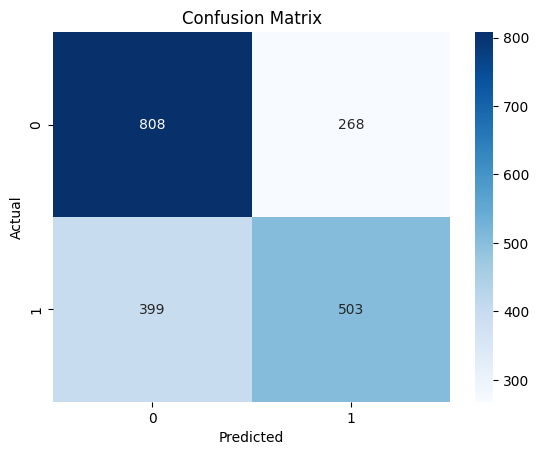

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(combined["actual"], combined["prediction"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()